## Lab | Handling Data Imbalance in Classification Models

#### Import the required libraries and modules that you would need.

In [23]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

#### Read that data into Python and call the dataframe churnData.

In [24]:
churnData = pd.read_csv('/Users/martinez/Documents/lab-handling-data-imbalance-classification/files_for_lab/Customer-Churn.csv')
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


#### Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [25]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [26]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [27]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### Check for null values in the dataframe. Replace the null values.

In [28]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [29]:
churnData['TotalCharges'].value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [30]:
# Numerical column -> fill with the mean
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

In [31]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.

- Split the data into a training set and a test set.

- Fit a logistic regression model on the training data.

- Check the accuracy on the test data.

In [32]:
categoricals = churnData.select_dtypes(np.object)
categoricals.head()

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Churn
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,No
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,No
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,No
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,Yes


In [33]:
categorical_cols = categoricals.columns
categorical_dummies = pd.get_dummies(categoricals, columns = categorical_cols, drop_first = True)
categorical_dummies

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
numericals = churnData.select_dtypes(np.number)
numericals.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [35]:
churnData_num = pd.concat([numericals,categorical_dummies],join = 'inner',axis =1)
churnData_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,2,53.85,108.15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0
7039,0,72,103.20,7362.90,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
churnData_num2 = churnData_num.drop(['Churn_Yes'], axis=1)
churnData_num2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,1,29.85,29.85,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
# Normalizer

from sklearn.preprocessing import Normalizer
X = churnData.select_dtypes(include = np.number)

transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

In [38]:
y = churnData['Churn']
X = churnData_num2

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [40]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [41]:
predictions = classification.predict(X_test)
print("The accuracy of the model is: %4.2f" % (classification.score(X_test, y_test)))

The accuracy of the model is: 0.79


#### Check for the imbalance.

In [42]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [43]:
churnData_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,2,53.85,108.15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0
7039,0,72,103.20,7362.90,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

In [44]:
# Downsampling

data = churnData_num

category_0 = data[data['Churn_Yes'] == 0]
category_1 = data[data['Churn_Yes'] == 1]

# We pick a random sample of rows from of observations belonging to "category_0"
# in the same amount of observations belonging to "category_1"
category_0 = category_0.sample(len(category_1))
print(category_0.shape)
print(category_1.shape)

data = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['Churn_Yes'].value_counts()

(1869, 23)
(1869, 23)


1    1869
0    1869
Name: Churn_Yes, dtype: int64

In [45]:
# Upsampling 

category_0 = data[data['Churn_Yes'] == 0]
category_1 = data[data['Churn_Yes'] == 1]

# Upsampling 
# As we are going to repeat observations, the random samples can be picked more then once,
# threfore we need to use the keyword: replace=True
category_1 = category_1.sample(len(category_0), replace=True)  
print(category_1.shape)

data = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1)
print(data['Churn_Yes'].value_counts())

(1869, 23)
1    1869
0    1869
Name: Churn_Yes, dtype: int64


In [46]:
y = data['Churn_Yes']
X = data.drop(['Churn_Yes'], axis=1)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [48]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [49]:
predictions = classification.predict(X_test)
print("The accuracy of the model is: %4.2f" % (classification.score(X_test, y_test)))

The accuracy of the model is: 0.76


### Activity

- Implement cross validation along with logistic regression and decision tree classifier on the data

    - Create a pipeline as shown in the class example
    
    - Note: you can directly use the upsampled data from SMOTE technique

In [50]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from scipy.stats import t, norm

In [51]:
print(X.shape)
print(y.shape)

(3738, 22)
(3738,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [53]:
model1 = DecisionTreeRegressor()
model2 = LinearRegression()
model3 = KNeighborsRegressor()

In [54]:
X_train.shape

(2504, 22)

In [55]:
model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']

scores = {}
i=0

# We set the significance level
alpha = 0.05
K = 10
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    if (K < 30):
        t_critical = abs(t.ppf(alpha, K-1))
        interval = t_critical*(np.std(cross_val_score(model, X_train, y_train, cv=10))/np.sqrt(K))
    else:
        z_critical = abs(norm.ppf(1-alpha/2))
        interval = z_critical*(np.std(cross_val_score(model, X_train, y_train, cv=10))/np.sqrt(K))
    scores[model_names[i]] = [mean_score, mean_score - interval, mean_score + interval]
    print("The rmse of the {} model is (CV witk K=10) {:4.2f} +/- {:4.2f}".format(model_names[i], mean_score, interval))
    i = i+1
    #print(scores)

The rmse of the Regression Tree model is (CV witk K=10) 0.06 +/- 0.03
The rmse of the Linear Regression model is (CV witk K=10) 0.33 +/- 0.03
The rmse of the KNN model is (CV witk K=10) 0.22 +/- 0.03


### Lab | Cross Validation

#### SMOTE

In [56]:
y = churnData['Churn']
X = churnData[['TotalCharges','tenure', 'SeniorCitizen','MonthlyCharges']]

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sm, y_sm = smote.fit_sample(x, y)
y_sm = y_sm.to_numpy()
y_sm = pd.Series(data=y_sm.flatten())
y_sm.value_counts()

No     5174
Yes    5174
dtype: int64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=100)

classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_train, y_train.values.ravel())
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The accuracy of the logistic_regression model is: 0.70 
The kappa of the logistic regression model is: 0.39 


In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_test, y_test)))

The accuracy of the model is: 0.75


#### TomekLinks

In [61]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(x, y)

unique, counts = np.unique(y_tl, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 4645]
 ['Yes' 1869]]


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_train, y_train)

The accuracy of the logistic_regression model is: 0.73 
The kappa of the logistic regression model is: 0.21 
              precision    recall  f1-score   support

         Yes       0.59      0.25      0.35       384
          No       0.75      0.93      0.83       919

    accuracy                           0.73      1303
   macro avg       0.67      0.59      0.59      1303
weighted avg       0.70      0.73      0.69      1303



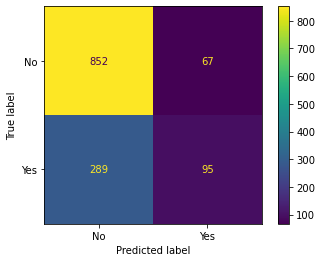

In [63]:
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred, labels=["Yes","No"]))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()

### Lab | Random Forests

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print("The accuracy of the Random forest is: {:4.2f}".format(clf.score(X_test, y_test)))
print()

alpha = 0.05
K = 10
# For cross validation
clf = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)

if (K < 30):
    t_critical = abs(t.ppf(alpha, K-1))
    interval = t_critical*(np.std(cross_val_score(clf, X_train, y_train, cv=10))/np.sqrt(K))
else:
    z_critical = abs(norm.ppf(1-alpha/2))
    interval = z_critical*(np.std(cross_val_score(clf, X_train, y_train, cv=10))/np.sqrt(K)) 
print("The accuracy of the Random Forest model (CV witk K=10) is: {:4.2f} +/- {:4.2f}".format(np.mean(cross_val_scores),interval))

The accuracy of the Random forest is: 0.78

The accuracy of the Random Forest model (CV witk K=10) is: 0.78 +/- 0.01
